# **Ridge Regression**

In [19]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge         # to use Ridge regularization you have to import Ridge in 'linear_model'
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

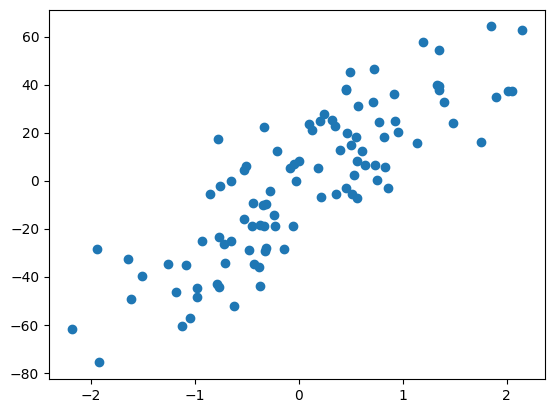

In [20]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

plt.show()


[27.82809103]
-2.29474455867698
*****************************************
[24.9546267]
-2.1269130035235735
*****************************************
[12.93442104]
-1.4248441496033308
*****************************************


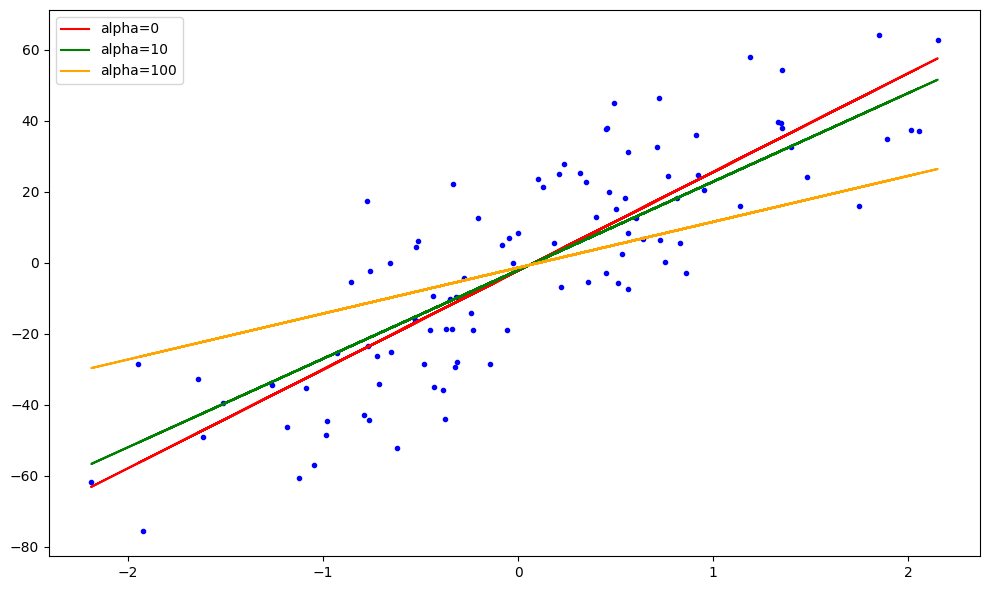

In [21]:
# using linear reg
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)
print("*****************************************")

# using ridge reg
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)
print("*****************************************")

# using ridge reg
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)
print("*****************************************")

# plotting the graph
plt.figure(figsize=(10,6))
plt.plot(X,y,'b.')
plt.plot(X, lr.predict(X), color='red', label='alpha=0')
plt.plot(X, rr.predict(X), color='green', label='alpha=10')
plt.plot(X, rr1.predict(X), color='orange', label='alpha=100')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()
    
    num = 0
    den = 0
    
    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)
        
    m = num/(den + alpha)
    b = y_mean - m*x_mean
        
    return m,b


class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass



reg = MeraRidge(alpha=100)
reg.fit(X,y)


[12.93442104] [-1.42484415]


### Ridge Regression Cost Function

The objective function for Ridge Regression (L2 Regularization) is:

$$J(\theta) = \sum_{i=1}^{m} (y^{(i)} - h_{\theta}(x^{(i)}))^2 + \lambda \sum_{j=1}^{n} \theta_j^2$$

In matrix notation:

$$\min_{w} \|Xw - y\|_2^2 + \alpha \|w\|_2^2$$
